## preprocessing

In [3]:
import pandas as pd

df = pd.read_csv('./origin/감성대화말뭉치_최종데이터__Validation.csv')

df['labels'] = df['감정_대분류'].map({'기쁨': '0', '당황': '1', '분노': '2', '불안': '3', '상처': '4', '슬픔': '5'})

# 'e'열을 그대로 가져오기
df['sentence'] = df['사람문장1']

# a1.csv 파일로 저장
df[['labels', 'sentence']].to_csv('./preprocess/감성대화말뭉치_pp.csv', index=False, encoding='utf-8-sig')


### count_item

In [10]:
import pandas as pd

def count_items(file_name, column_name):
    df = pd.read_csv(file_name)
    item_counts = df[column_name].value_counts()
    return item_counts

print(count_items('./preprocess/감성대화말뭉치_pp.csv','labeling'))

labeling
2    1257
0    1213
3    1113
1    1048
4    1007
5    1003
Name: count, dtype: int64


### count_items_visualization

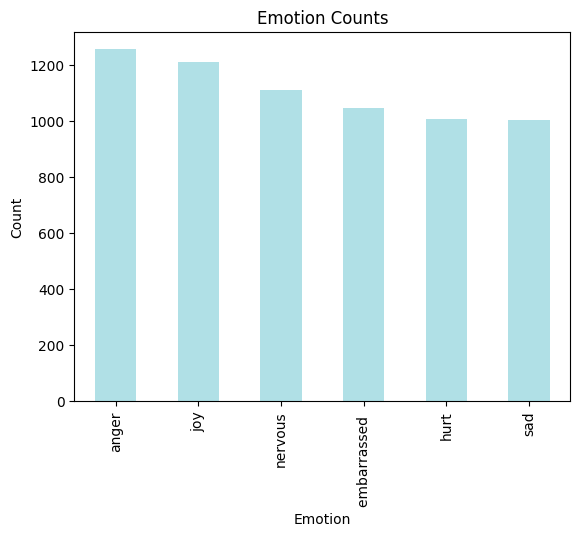

None


In [41]:
import pandas as pd
import matplotlib.pyplot as plt


emotion_map = {0: 'joy', 1: 'embarrassed ', 2: 'anger', 3: 'nervous', 4: 'hurt', 5: 'sad'}

def count_items_visualization(file_name, column_name):

    counts = count_items(file_name, column_name)
    counts.index = counts.index.map(emotion_map)

    # 시각화 (막대 그래프)
    counts.plot(kind='bar', color='powderblue')
    
    plt.title('Emotion Counts')
    plt.xlabel('Emotion')
    plt.ylabel('Count')

    plt.show()

print(count_items_visualization('./preprocess/감성대화말뭉치_pp.csv','labeling'))


## train, test, val 데이터셋 구성
test(테스트), val(검증)

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 원본 데이터셋 로드
data_path = './preprocess/감성대화말뭉치_pp.csv'  # 원본 CSV 파일 경로를 지정하세요.
data = pd.read_csv(data_path)

# 데이터셋을 train (70%), val (15%), test (15%)로 나누기
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)  # 70% 훈련용 데이터
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)  # 나머지 30%에서 50%씩 나누기

# 데이터셋을 각각의 CSV 파일로 저장
train_data.to_csv('./preprocess/감성대화말뭉치_train.csv', index=False, encoding='utf-8-sig')
val_data.to_csv('./preprocess/감성대화말뭉치_val.csv', index=False, encoding='utf-8-sig')
test_data.to_csv('./preprocess/감성대화말뭉치_test.csv', index=False, encoding='utf-8-sig')

print("Train, Validation, and Test datasets have been created and saved.")


Train, Validation, and Test datasets have been created and saved.


commit test

commit test2